In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("finalised_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  float64
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
 16  Yield           12496 non-null  float64
dtypes: float64(10), int64(2), objec

In [5]:
df.shape

(12628, 17)

In [6]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
Yield             132
dtype: int64

In [7]:
df = df.drop(df[df['production'].isnull()].index)
df = df.drop(df[df['Yield'].isnull()].index)

In [8]:
df.isnull().sum()

Unnamed: 0        0
state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
Yield             0
dtype: int64

In [9]:
df.shape

(12496, 17)

In [10]:
df['soil_type'].unique()

array(['loamy', 'sandy', 'clay', 'chalky', 'peaty', 'silty', 'silt'],
      dtype=object)

In [11]:
df['crop_names'].unique()

array(['Maize', 'Arhar/Tur', 'Bajra', 'Gram', 'Jowar',
       'Moong(Green Gram)', 'Pulses total', 'Ragi', 'Rice', 'Sugarcane',
       'Total foodgrain', 'Urad', 'Other  Rabi pulses', 'Wheat',
       'Cotton(lint)', 'Castor seed', 'Groundnut', 'Niger seed',
       'Other Cereals & Millets', 'Other Kharif pulses', 'Sesamum',
       'Soyabean', 'Sunflower', 'Linseed', 'Safflower', 'Small millets',
       'Rapeseed &Mustard', 'other oilseeds', 'Banana', 'Grapes', 'Mango',
       'Onion', 'Tomato', 'Tobacco'], dtype=object)

In [12]:
df['season_names'].unique()

array(['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year '], dtype=object)

In [13]:
df['district_names'].unique()

array(['AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD', 'BEED',
       'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR',
       'MUMBAI', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD',
       'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI',
       'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM',
       'YAVATMAL'], dtype=object)

In [14]:
#describing all the numeric columns in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12496.0,131496.602833,3642.305959,125191.000000,128342.750000,131492.500000,134645.250000,1.378180e+05
crop_year,12496.0,2005.177977,5.012958,1997.000000,2001.000000,2005.000000,2010.000000,2.014000e+03
area,12496.0,25783.133563,59352.520458,1.000000,500.000000,3600.000000,23400.000000,7.263000e+05
temperature,12496.0,21.044197,0.595380,20.020095,20.521441,21.048002,21.556143,2.207986e+01
wind_speed,12496.0,2.039796,0.040673,1.970008,2.004352,2.039791,2.075307,2.109983e+00
pressure,12496.0,1014.500796,0.865105,1013.000384,1013.759452,1014.501598,1015.250983,1.016000e+03
humidity,12496.0,21.034510,0.592442,20.020101,20.528607,21.028289,21.541321,2.207998e+01
N,12496.0,63.628838,206.857679,0.000000,0.615000,4.068000,10.580000,9.283720e+02
P,12496.0,13.188444,23.775753,0.000000,0.000000,3.760000,15.870000,1.112000e+02
K,12496.0,6.224012,14.153817,0.000000,0.000000,0.000000,1.501000,5.560000e+01


In [15]:
#describing all the non-numeric columns 
df.describe(exclude=np.number).T

,count,unique,top,freq
state_names,12496,1,Maharashtra,12496
district_names,12496,35,AHMEDNAGAR,488
season_names,12496,5,Kharif,7201
crop_names,12496,34,Maize,1053
soil_type,12496,7,clay,1825


In [16]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [17]:
df.rename(columns={'N':'Nitrogen'},inplace=True)
df.rename(columns={'P':'Phosphorous'},inplace=True)
df.rename(columns={'K':'Pottasium'},inplace=True)

In [18]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,Nitrogen,Phosphorous,Pottasium,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [19]:
df.duplicated().sum()

0

In [20]:
column_counts=df['district_names'].value_counts()
print(column_counts)

district_names
AHMEDNAGAR    488
PUNE          487
SATARA        474
PARBHANI      465
LATUR         463
BEED          463
OSMANABAD     461
NANDED        456
NASHIK        455
SOLAPUR       452
SANGLI        445
JALNA         427
AURANGABAD    424
DHULE         417
KOLHAPUR      406
BULDHANA      401
JALGAON       401
AMRAVATI      396
NAGPUR        385
HINGOLI       375
NANDURBAR     374
YAVATMAL      353
AKOLA         350
CHANDRAPUR    325
WARDHA        324
WASHIM        302
GADCHIROLI    301
BHANDARA      287
THANE         266
RAIGAD        230
GONDIA        226
RATNAGIRI     208
SINDHUDURG    198
PALGHAR        10
MUMBAI          1
Name: count, dtype: int64


In [21]:
column_counts=df['season_names'].value_counts()
print(column_counts)

season_names
Kharif         7201
Rabi           3767
Summer         1010
Whole Year      511
Autumn            7
Name: count, dtype: int64


In [22]:
column_counts=df['crop_names'].value_counts()
print(column_counts)

crop_names
Maize                      1053
Sunflower                   946
Jowar                       875
Groundnut                   868
Rice                        652
Sesamum                     648
Arhar/Tur                   569
Moong(Green Gram)           565
Urad                        548
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       384
Rapeseed &Mustard           357
Other Kharif pulses         336
Safflower                   335
Niger seed                  305
Other  Rabi pulses          296
Castor seed                 285
Linseed                     275
Small millets               210
Ragi                        206
Other Cereals & Millets      82
other oilseeds               38
Mango                        31
Tomato                       30
Total foodgrain              29
Pulses total                 29
Banana                       

In [23]:
#Checking for outliers

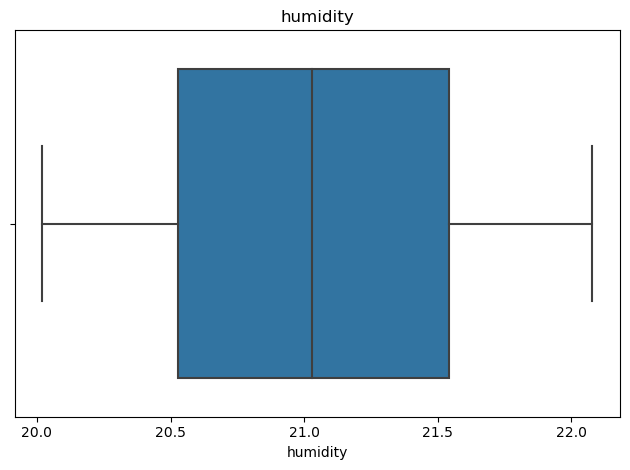

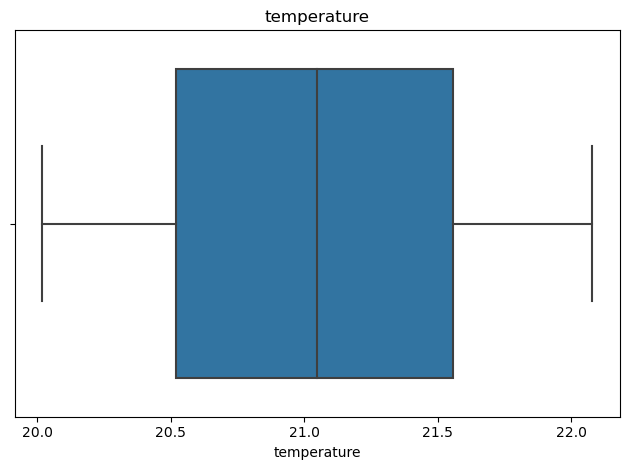

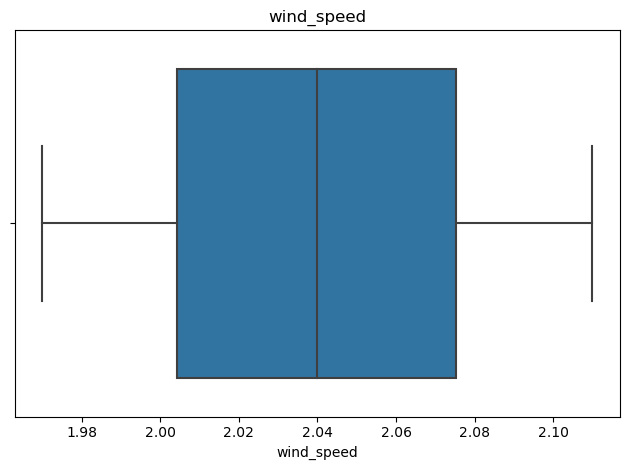

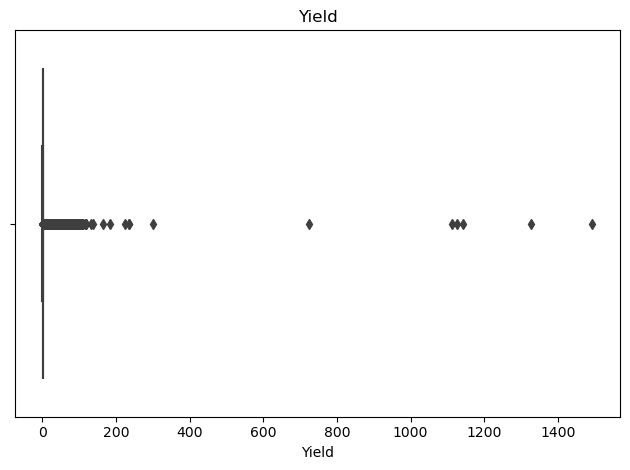

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name=['humidity','temperature','wind_speed','Yield']
for i in column_name:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [25]:
q1=df['Yield'].quantile(0.25)
q3=df['Yield'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(0.41059981684981683, 1.2265340098303472, 0.8159341929805304)

In [26]:
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
lowerlimit,upperlimit

(-0.8133014726209786, 2.4504352993011427)

In [27]:
outliers=[]
outliers=df.loc[(df['Yield']>upperlimit) | (df['Yield']<lowerlimit)].index
print(outliers)

Index([    0,    18,    34,    82,   112,   144,   175,   206,   207,   209,
       ...
       12533, 12538, 12549, 12558, 12562, 12573, 12583, 12600, 12614, 12627],
      dtype='int64', length=1005)


In [28]:
new_df=df.loc[(df['Yield']<upperlimit) & (df['Yield']>lowerlimit)]
print("before removing outliers",len(df))
print("after removing outliers",len(new_df))

before removing outliers 12496
after removing outliers 11491


In [29]:
new_df=df.copy()
new_df.loc[(df['Yield']>upperlimit),'Yield']=upperlimit
new_df.loc[(df['Yield']<lowerlimit),'Yield']=lowerlimit

<Axes: >

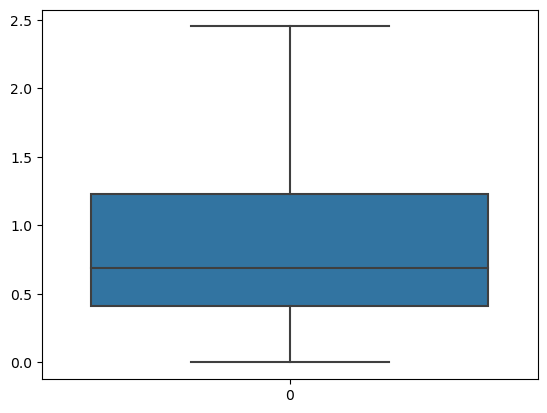

In [30]:
sns.boxplot(new_df['Yield'])

In [31]:
df = df.drop(outliers)

In [32]:
df.shape

(11491, 17)

In [33]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,Nitrogen,Phosphorous,Pottasium,production,Yield
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.000,1100.0,1.222222
5,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400.0,21.642354,2.075066,1015.702482,21.571403,sandy,5.64,14.664,14.664,4700.0,1.068182


In [34]:
df = df.drop(['state_names'],axis=1)

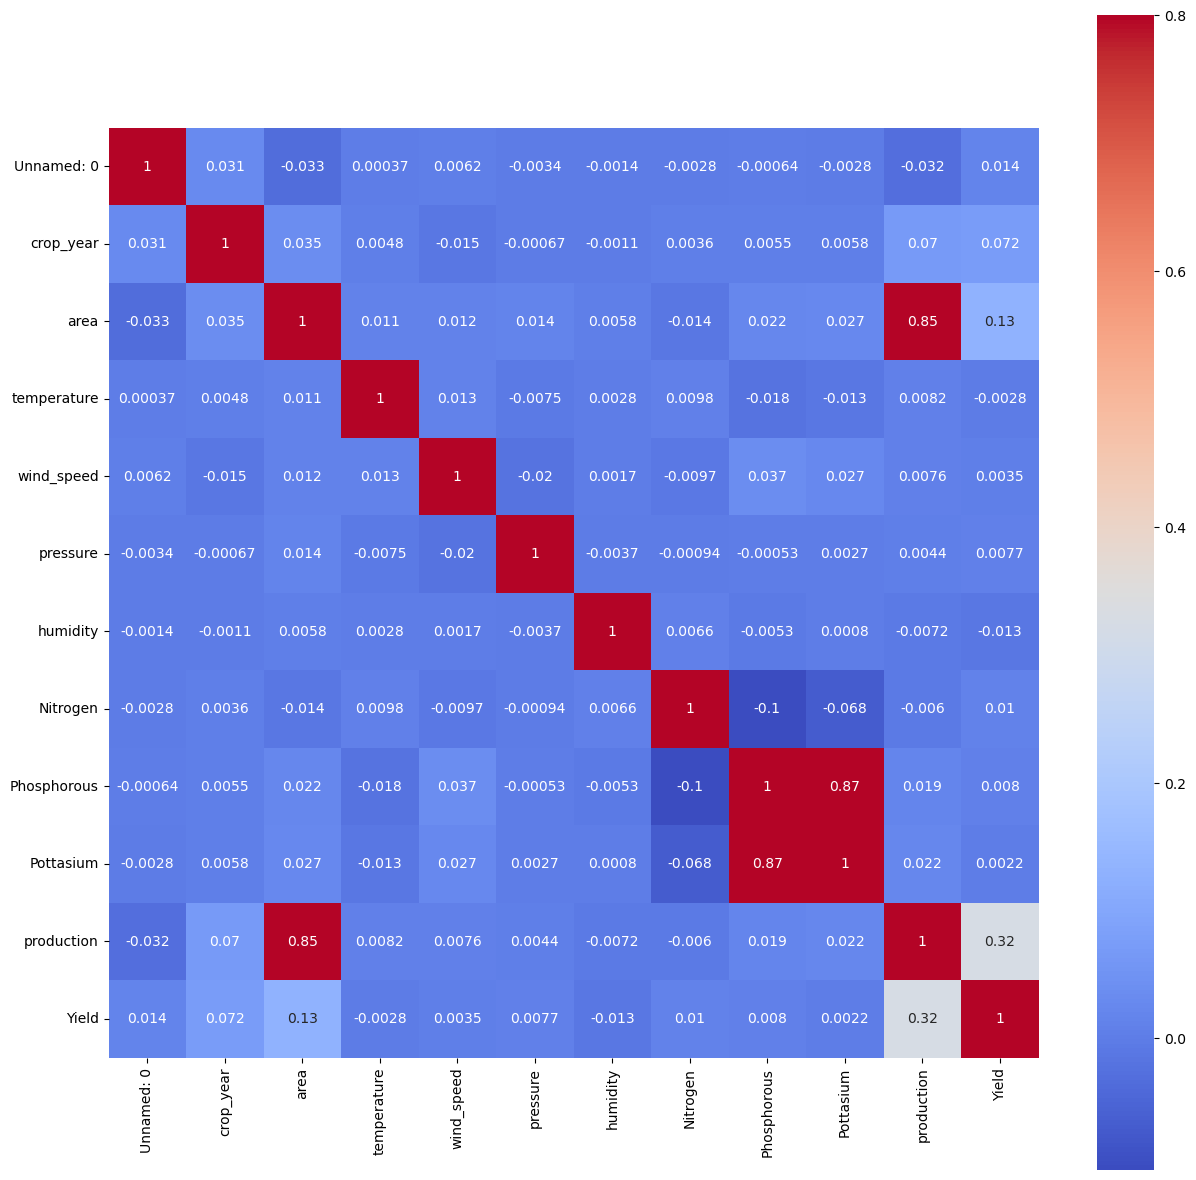

In [35]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Selects only numeric columns
C_mat=numeric_df.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(C_mat,vmax=.8,square=True,cmap='coolwarm',annot=True)
plt.show()

In [36]:
#Converting categorical to numeric

In [37]:
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['soil_type']))
df

,Unnamed: 0,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,...,Urad,Wheat,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
1,125192,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,...,False,False,False,False,False,False,False,True,False,False
2,125193,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,...,False,False,False,False,True,False,False,False,False,False
3,125194,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,...,False,False,False,True,False,False,False,False,False,False
4,125195,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,...,False,False,False,False,True,False,False,False,False,False
5,125196,AHMEDNAGAR,1997,Kharif,Maize,4400.0,21.642354,2.075066,1015.702482,21.571403,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,137813,YAVATMAL,2014,Rabi,Gram,38500.0,21.755582,2.014701,1015.121154,20.091311,...,False,False,False,False,False,False,False,True,False,False
12623,137814,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,...,False,False,False,False,False,False,False,False,False,True
12624,137815,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,...,False,False,False,False,False,False,False,False,True,False
12625,137816,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,...,False,True,False,False,False,False,False,True,False,False


In [38]:
print(df.columns)

Index(['Unnamed: 0', 'district_names', 'crop_year', 'season_names',
       'crop_names', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'soil_type', 'Nitrogen', 'Phosphorous', 'Pottasium',
       'production', 'Yield', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD',
       'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR', 'MUMBAI',
       'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PALGHAR',
       'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI', 'SATARA',
       'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM', 'YAVATMAL',
       'Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)',
       'Gram', 'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Mango',
       'Moong(Green Gram)', 'Niger seed', 'Other  Rabi pulses',
       'Other Cereals & Millets', 'Other Kharif pulses', 'Pulses to

In [39]:
df = df.drop('production', axis=1)
df = df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)
df = df.drop('soil_type', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('crop_year', axis=1)
df

,area,temperature,wind_speed,pressure,humidity,Nitrogen,Phosphorous,Pottasium,Yield,AHMEDNAGAR,...,Urad,Wheat,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
1,17600.0,20.160426,1.976480,1015.193528,20.643237,9.000,9.000,0.000,0.357955,True,...,False,False,False,False,False,False,False,True,False,False
2,274100.0,21.998299,2.000524,1014.184607,21.422312,0.000,0.000,0.000,0.557461,True,...,False,False,False,False,True,False,False,False,False,False
3,40800.0,21.776377,2.019750,1015.053118,21.810567,38.250,38.250,38.250,0.455882,True,...,False,False,False,True,False,False,False,False,False,False
4,900.0,20.075734,1.974351,1015.170238,21.930206,0.000,23.184,0.000,1.222222,True,...,False,False,False,False,True,False,False,False,False,False
5,4400.0,21.642354,2.075066,1015.702482,21.571403,5.640,14.664,14.664,1.068182,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,38500.0,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,0.846753,False,...,False,False,False,False,False,False,False,True,False,False
12623,4000.0,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,0.825000,False,...,False,False,False,False,False,False,False,False,False,True
12624,1300.0,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,0.153846,False,...,False,False,False,False,False,False,False,False,True,False
12625,29100.0,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,0.920962,False,...,False,True,False,False,False,False,False,True,False,False


In [40]:
from sklearn import preprocessing

In [41]:
x=df[['area']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
x_scaled

array([[0.02423107],
       [0.3773914 ],
       [0.05617383],
       ...,
       [0.00178852],
       [0.04006477],
       [0.01294095]])

In [42]:
df['area']=x_scaled
df

,area,temperature,wind_speed,pressure,humidity,Nitrogen,Phosphorous,Pottasium,Yield,AHMEDNAGAR,...,Urad,Wheat,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
1,0.024231,20.160426,1.976480,1015.193528,20.643237,9.000,9.000,0.000,0.357955,True,...,False,False,False,False,False,False,False,True,False,False
2,0.377391,21.998299,2.000524,1014.184607,21.422312,0.000,0.000,0.000,0.557461,True,...,False,False,False,False,True,False,False,False,False,False
3,0.056174,21.776377,2.019750,1015.053118,21.810567,38.250,38.250,38.250,0.455882,True,...,False,False,False,True,False,False,False,False,False,False
4,0.001238,20.075734,1.974351,1015.170238,21.930206,0.000,23.184,0.000,1.222222,True,...,False,False,False,False,True,False,False,False,False,False
5,0.006057,21.642354,2.075066,1015.702482,21.571403,5.640,14.664,14.664,1.068182,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.053007,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,0.846753,False,...,False,False,False,False,False,False,False,True,False,False
12623,0.005506,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,0.825000,False,...,False,False,False,False,False,False,False,False,False,True
12624,0.001789,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,0.153846,False,...,False,False,False,False,False,False,False,False,True,False
12625,0.040065,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,0.920962,False,...,False,True,False,False,False,False,False,True,False,False


In [43]:
df=df.fillna(df.mean())

In [44]:
df

,area,temperature,wind_speed,pressure,humidity,Nitrogen,Phosphorous,Pottasium,Yield,AHMEDNAGAR,...,Urad,Wheat,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
1,0.024231,20.160426,1.976480,1015.193528,20.643237,9.000,9.000,0.000,0.357955,True,...,False,False,False,False,False,False,False,True,False,False
2,0.377391,21.998299,2.000524,1014.184607,21.422312,0.000,0.000,0.000,0.557461,True,...,False,False,False,False,True,False,False,False,False,False
3,0.056174,21.776377,2.019750,1015.053118,21.810567,38.250,38.250,38.250,0.455882,True,...,False,False,False,True,False,False,False,False,False,False
4,0.001238,20.075734,1.974351,1015.170238,21.930206,0.000,23.184,0.000,1.222222,True,...,False,False,False,False,True,False,False,False,False,False
5,0.006057,21.642354,2.075066,1015.702482,21.571403,5.640,14.664,14.664,1.068182,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.053007,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,0.846753,False,...,False,False,False,False,False,False,False,True,False,False
12623,0.005506,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,0.825000,False,...,False,False,False,False,False,False,False,False,False,True
12624,0.001789,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,0.153846,False,...,False,False,False,False,False,False,False,False,True,False
12625,0.040065,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,0.920962,False,...,False,True,False,False,False,False,False,True,False,False


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
y = df['Yield']
X =df.drop('Yield', axis = 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import scipy.stats as stats
import statistics 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor()
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100], 'max_depth':[5,7,9]},
    {'n_estimators': [20, 25, 30], 'max_depth':[5,7,9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print('MSE =', mean_squared_error(y_test, y_pred))
    print('MAE =', mean_absolute_error(y_test, y_pred))
    print()

LinearRegression:
Best parameters: {}
Best R2 score: -7.358998653502647e+25
MSE = 0.12181670412298458
MAE = 0.26212267195864414

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.4761194829806975
MSE = 0.1456254183989894
MAE = 0.28579986433563503

RandomForestRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 100}
Best R2 score: 0.5815553644637831
MSE = 0.11302236135877683
MAE = 0.2559604259796882

XGBRegressor:
Best parameters: {'max_depth': 5, 'n_estimators': 30}
Best R2 score: 0.6475966981709725
MSE = 0.09392470865519621
MAE = 0.22580632439080525



In [52]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_estimators=300, max_depth=15)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(y_test, y_pred))
print('MAE =', mae(y_test, y_pred))
print('R2 Score =', r2_score(y_test, y_pred))

MSE = 0.09511802054471588
MAE = 0.22547328050011045
R2 Score = 0.6543650904224245


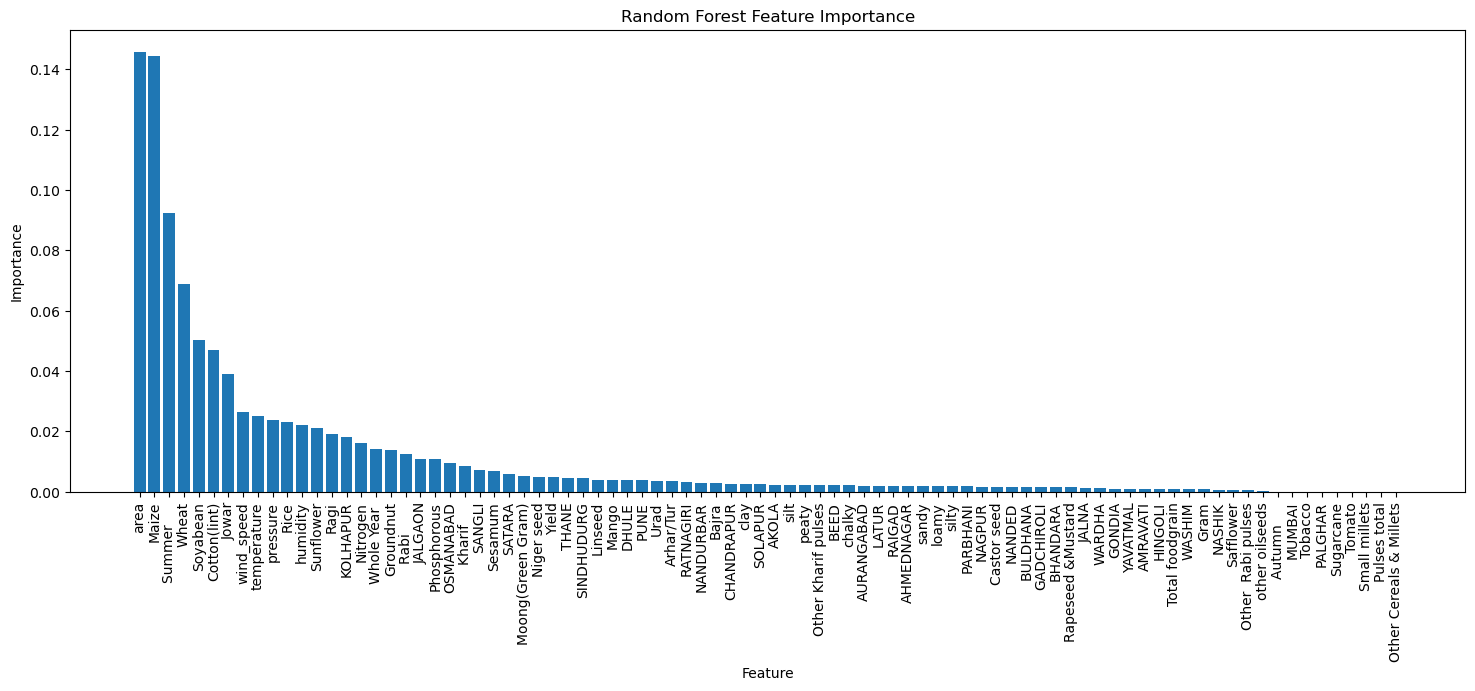

In [53]:
# Assuming regr is your RandomForestRegressor model
feature_importances = regr.feature_importances_

# Assuming df is your DataFrame
df_columns = df.columns.tolist()

exclude_columns = {'Pottasium'}  # Update with the mismatched column name(s)
df_columns = [col for col in df_columns if col not in exclude_columns]

# Check if lengths match
if len(feature_importances) != len(df_columns):
    print("Mismatched columns:")
    print(set(df_columns) - set(feature_importances))
    raise ValueError("Lengths of feature_importances and df_columns must be the same.")

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(18, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [df_columns[i] for i in indices], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [54]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1.33562689 0.36451047 0.28514608 ... 1.13487799 0.5157381  0.49271877]


In [55]:
row_index=11

print("Actual Values:")
print(y_test[row_index])

print("\nPredicted Values:")
print(y_pred[row_index])

Actual Values:
0.5425531914893617

Predicted Values:
0.6970169801636156


In [56]:
print(y_pred)

[1.33562689 0.36451047 0.28514608 ... 1.13487799 0.5157381  0.49271877]


In [57]:
from sklearn.ensemble import GradientBoostingRegressor 
aa=GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
aa.fit(X_train, y_train)
y_pred = aa.predict(X_test)

print('MSE =', mse(y_test, y_pred))
print('MAE =', mae(y_test, y_pred))
print('R2 Score =', r2_score(y_test, y_pred))

MSE = 0.09023953223258013
MAE = 0.21874855970742307
R2 Score = 0.6720922871931732
